# データのグルーピング

## GroupByオブジェクト

In [1]:
import pandas as pd

tips = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/tips.csv",
    dtype={
        "sex": "category",
        "smoker": "category",
        "day": "category",
        "time": "category",
    },
)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips_groupby_time = tips.groupby("time")
type(tips_groupby_time)

pandas.core.groupby.generic.DataFrameGroupBy

In [3]:
total_bill_groupby_time = tips.loc[:, "total_bill"].groupby(
    tips.loc[:, "time"]
)
type(total_bill_groupby_time)

pandas.core.groupby.generic.SeriesGroupBy

In [4]:
tips.groupby(["day", "time"])

In [5]:
tips_groupby_time.get_group("Dinner").head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips_groupby_time.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2


In [7]:
tips_groupby_time.tail(2)

,total_bill,tip,sex,smoker,day,time,size
225,16.27,2.50,Female,Yes,Fri,Lunch,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
tips_groupby_time.nth(3)

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2


In [9]:
tips.groupby(["day", "time"]).get_group(("Fri", "Dinner")).head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


## データの集約

In [10]:
tips_groupby_time.sum(numeric_only=True)

,total_bill,tip,size
time,,,
Dinner,3660.30,546.07,463
Lunch,1167.47,185.51,164


In [11]:
tips_groupby_time[["tip", "total_bill"]].mean()

,tip,total_bill
time,,
Dinner,3.102670,20.797159
Lunch,2.728088,17.168676


In [12]:
tips_groupby_time["tip"].aggregate(["sum", "mean"])
# or
tips_groupby_time["tip"].agg(["sum", "mean"])

,sum,mean
time,,
Dinner,546.07,3.102670
Lunch,185.51,2.728088


In [13]:
def my_func(x):
    """2σを算出する関数"""
    return x.std() * 2


tips_groupby_time["total_bill"].aggregate(my_func)

time
Dinner    18.284058
Lunch     15.427764
Name: total_bill, dtype: float64

In [14]:
tips_groupby_time.aggregate({"total_bill": min, "tip": max})

,total_bill,tip
time,,
Dinner,3.07,10.0
Lunch,7.51,6.7


In [15]:
tips_groupby_time["tip"].apply(my_func)

time
Dinner    2.872486
Lunch     2.410691
Name: tip, dtype: float64

In [16]:
def min_max_ser(x):
    return pd.Series(
        [x.min(), x.max()],
        index=["min", "max"],
    )


tips_groupby_time["tip"].apply(min_max_ser)

time       
Dinner  min     1.00
        max    10.00
Lunch   min     1.25
        max     6.70
Name: tip, dtype: float64

In [17]:
def min_max_df(x):
    return pd.DataFrame(
        {
            "min": [x.min()],
            "max": [x.max()],
        },
        index=["min", "max"]
    )


tips_groupby_time["tip"].apply(min_max_df)

min   max
time                  
Dinner min  1.00  10.0
       max  1.00  10.0
Lunch  min  1.25   6.7
       max  1.25   6.7

## GroupByオブジェクトのフィルタリング

In [18]:
over3 = tips.groupby("day").filter(lambda x: x["tip"].mean() > 3)
over3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
over3.loc[:, "day"].unique()

['Sun']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']

## GroupByオブジェクトのデータの可視化

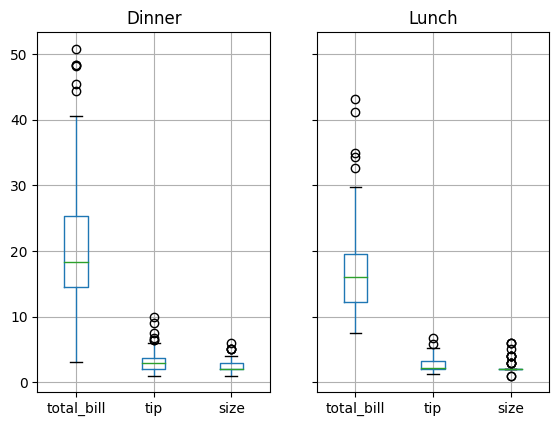

In [20]:
tips.groupby("time").boxplot();